In [1]:
# Импортирование библиотек для иницализации основных параметров системы
from calc_tools import Fazy, System, Garmoniki, Rachety, Looper, AttribHolder, PodStans, PhaseHolder

# Импортирование неодходимых библиотек
from os import path
import time
import pandas as pd, numpy as np
from collections import namedtuple
from calc_tools import pairwise_1, pairwise_2
from scipy.linalg import logm, expm, sqrtm
from multiprocessing import Pool
from numpy.linalg import inv
from numpy import linalg as LA

# Импортирование библиотек для визуализации данных !!!!!
import matplotlib.pyplot as plot
import matplotlib as mpl
import seaborn as sns
import plotly as pt
import plotly.express as px
%matplotlib inline
import plotly.graph_objects as go

In [2]:
# Задание значении характеристик материала для фаз и троса
Faza_A = Fazy("Фаза А", 35.336, 1.0, 150.0, 0.0, 19.0)
Faza_B = Fazy("Фаза В", 35.336, 1.0, 150.0, 6.3, 19.0)
Faza_C = Fazy("Фаза С", 35.336, 1.0, 150.0, 4.2, 25.0)
Tross = Fazy("Тросс", 17.336, 4000.0, 50.0, 2.1, 28.0)


# В данном случае у нас будет 50 гармоник от [1 до 50]
garmoniki = Garmoniki(50)


# Создание объекта для проведения расчетов
rashet = Rachety()


# Вычисление погонных активных сопротивлении для фаз и троса.
# Получаем матрицу с размерностью [4 на 50]
pogon_aktiv_soprotiv_faz = rashet.pogon_aktiv_soprotiv(Fazy, garmoniki)


# Вычисление погонных индуктивных сопротивлении для фаз и троса.
# Получаем матрицу с размерностью [4 х 4 х 50]
inductiv_soprotiv_faz = rashet.inductiv_soprotiv(Fazy, garmoniki)


# Вычисление погонных ёмкостных проводимостей для фаз и троса.
# Получаем матрицу с размерностью [4 х 4 х 50]
emkostn_provodimost_faz = rashet.emkostnaya_provodimost(Fazy, garmoniki)


# Матрица полных погонных прводимостей
Y = rashet.polnaya_provodimost(emkostn_provodimost_faz)


# Матрица полных погонных сопротивлении
Z = rashet.polnoe_soprotivlenye(inductiv_soprotiv_faz, pogon_aktiv_soprotiv_faz)


# Функция для расчета комплексных квадратных матриц лямбда_напряж и лямбда_ток
lambda_U, lambda_I = rashet.calculate_lambdas(Z, Y)


# Функция для расчета комплексных квадратных матриц экспонен_напряжения и экспонента_ток
# Для примера были взяты значения для отрезка 300
pos_expon_U, neg_expon_U = rashet.calculate_exponentials(lambda_U, 300)
pos_expon_I, neg_expon_I = rashet.calculate_exponentials(lambda_I, 300)

In [3]:
# Установка конфигурации для выведения данных
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)

In [4]:
# Инициализация объекта для подстанции "Зеленая" и чтение файла
basepath = path.abspath('')
filepath = path.abspath(path.join(basepath, "..", path.join("data", "Данные ПС Сарепта1.xls")))
PodS_zelenaya = PodStans(filepath, volt=110, harm_num=49)

In [5]:
# Проверяем наименование присоединении  
print(PodS_zelenaya.vse_prisoed)
PodS_zelenaya.prisoed_1.naimen

['20 (ПС Сарепта-1 -- отп. 21 на ПС Сарепта-2', '21 (ПС Сарепта-1 -- отп. 6 от ВЛ 21']


'20 (ПС Сарепта-1 -- отп. 21 на ПС Сарепта-2'

In [6]:
# Смотрим в объединенную таблицу гармник Тока или Напряжения Фазы А для данного присоединения 
PodS_zelenaya.prisoed_1.faza_A("U")

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,...,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97
0,0.028,181.5,0.424,55.0,0.157,176.0,0.406,320.0,0.345,42.6,0.622,93.4,0.037,135.1,0.133,171.2,0.058,300.3,0.828,166.3,0.183,147.8,0.595,135.1,0.100,...,358.2,0.246,117.2,0.123,265.3,0.170,313.6,0.204,94.3,0.084,119.0,0.052,40.6,0.045,227.1,0.024,354.7,0.154,282.0,0.056,128.3,0.139,139.4,0.135,81.4
1,0.127,186.4,0.415,32.5,0.053,347.8,0.475,312.1,0.050,194.9,0.461,88.3,0.044,240.6,0.092,156.9,0.119,8.7,1.036,162.0,0.093,134.6,0.579,102.2,0.166,...,184.4,0.112,132.6,0.073,108.9,0.101,353.4,0.057,295.0,0.142,313.5,0.126,149.0,0.087,206.9,0.028,107.7,0.094,236.8,0.067,75.7,0.076,338.7,0.154,246.3
2,0.021,4.3,0.241,334.8,0.015,95.7,0.473,286.1,0.066,245.0,0.385,62.0,0.041,336.2,0.223,57.4,0.117,279.0,1.015,141.3,0.065,117.9,0.612,84.9,0.054,...,5.4,0.069,49.0,0.023,326.4,0.119,358.3,0.106,107.2,0.047,36.4,0.124,295.4,0.090,358.2,0.055,34.9,0.163,266.2,0.016,38.0,0.128,314.8,0.074,342.5
3,0.079,182.0,0.248,358.0,0.040,294.4,0.557,281.3,0.080,284.6,0.345,70.1,0.089,69.5,0.060,33.7,0.061,342.0,0.794,144.3,0.112,242.2,0.497,52.5,0.113,...,308.2,0.060,90.1,0.025,81.0,0.040,81.8,0.024,243.5,0.079,44.6,0.161,72.1,0.028,66.4,0.044,100.1,0.115,341.3,0.103,214.4,0.051,314.7,0.037,324.4
4,0.14,325.0,0.268,150.4,0.079,23.2,0.563,73.0,0.088,61.8,0.377,200.2,0.073,145.6,0.091,235.0,0.102,54.9,0.955,284.0,0.064,243.8,0.447,230.6,0.093,...,200.8,0.068,145.8,0.066,45.2,0.169,202.1,0.072,103.0,0.123,225.5,0.084,312.3,0.047,194.1,0.037,128.9,0.121,43.1,0.026,277.8,0.053,212.2,0.217,44.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
561,0.072,120.2,0.558,72.4,0.333,291.9,0.537,342.0,0.166,12.1,0.353,72.4,0.168,162.1,0.154,233.2,0.022,280.8,1.109,178.3,0.062,16.7,0.556,126.9,0.040,...,90.0,0.012,302.0,0.093,35.6,0.172,90.9,0.075,122.5,0.021,347.8,0.055,62.0,0.058,65.8,0.034,250.4,0.086,322.9,0.032,326.6,0.057,190.7,0.047,6.1
562,0.058,258.1,0.528,1.6,0.028,321.9,0.608,276.8,0.366,21.8,0.215,91.0,0.251,222.4,0.015,215.3,0.048,31.4,1.116,148.2,0.044,129.1,0.562,97.7,0.119,...,168.4,0.016,113.3,0.031,222.3,0.046,268.7,0.102,305.8,0.053,351.9,0.112,140.8,0.042,207.7,0.020,19.3,0.064,174.5,0.048,142.0,0.108,267.9,0.093,12.8
563,0.085,188.8,0.558,40.7,0.092,109.5,0.568,310.2,0.435,69.7,0.536,97.1,0.130,203.6,0.139,151.3,0.033,253.2,1.089,175.6,0.062,4.7,0.463,130.0,0.078,...,3.6,0.045,117.8,0.044,176.8,0.020,38.4,0.025,179.6,0.021,276.8,0.099,126.7,0.044,310.2,0.016,256.7,0.048,287.5,0.107,175.6,0.106,96.8,0.130,141.8
564,0.1,5.8,0.328,317.4,0.105,342.9,0.502,218.0,0.084,40.7,0.437,350.5,0.363,209.6,0.132,31.1,0.190,92.4,0.981,86.3,0.026,177.9,0.611,43.5,0.113,...,310.8,0.063,17.7,0.155,181.5,0.077,82.6,0.085,175.6,0.040,47.3,0.061,140.1,0.145,82.9,0.081,40.7,0.067,90.0,0.063,76.5,0.109,3.3,0.056,355.2


In [7]:
# !!! Подготовка данных для визуализации

In [6]:
# 2-ая Гармоника НАПРЯЖЕНИЯ и ТОКА, ПЕРВОГО присоединения, ФАЗЫ А
harU2 = PodS_zelenaya.prisoed_1.faza_A.get_harmonic(2, 'U')
harI2 = PodS_zelenaya.prisoed_1.faza_A.get_harmonic(2, 'I')

In [7]:
# Сумма всех гармоник ТОКА, ПЕРВОГО присоединения, ФАЗЫ А
all_hars = PodS_zelenaya.prisoed_1.faza_A.add_harmonics('I')

In [8]:
rms_u = PodS_zelenaya.prisoed_1.faza_A.get_rms('U')
rms_i = PodS_zelenaya.prisoed_1.faza_A.get_rms('I')

In [9]:
main_har_i = PodS_zelenaya.prisoed_1.faza_A.get_main_harm('I')
main_har_u = PodS_zelenaya.prisoed_1.faza_A.get_main_harm('U')

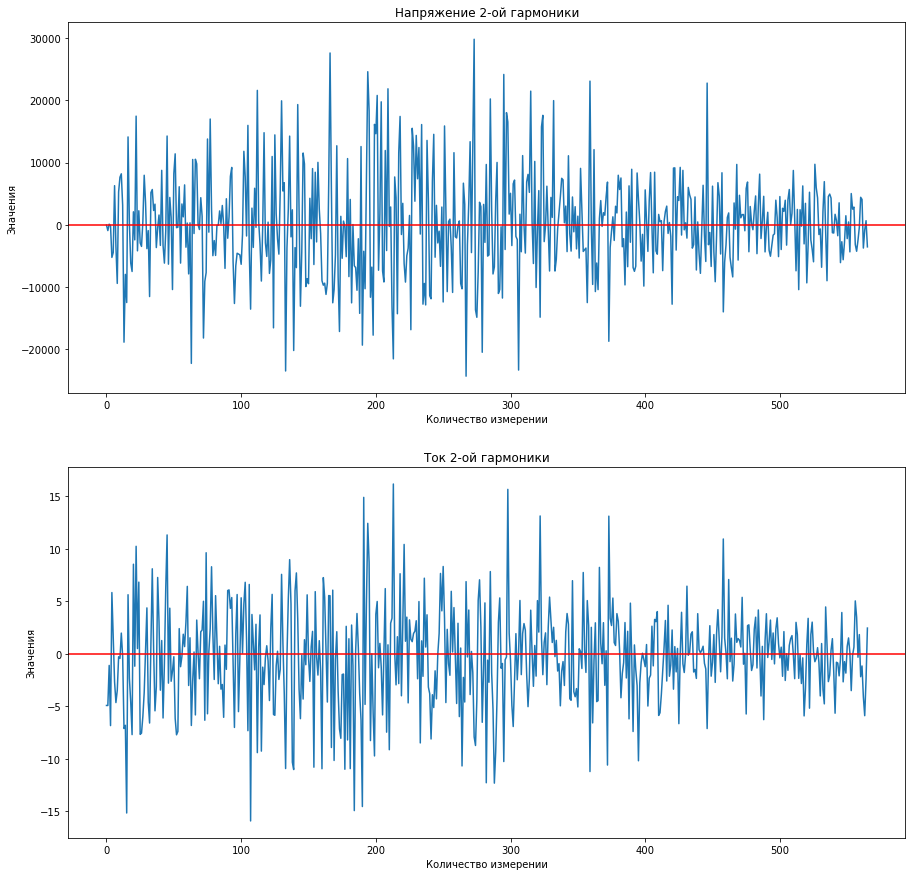

In [10]:
fig, ax = plot.subplots(2, figsize=(15,15))
ax1, ax2 = ax[0], ax[1]

color = "black"

ax1.plot(harU2)


ax1.set_xlabel('Количество измерении').set_color(color)
ax1.set_ylabel('Значения').set_color(color)
ax1.spines['bottom'].set_color(color)
ax1.spines['top'].set_color(color)
ax1.xaxis.label.set_color(color)
ax1.tick_params(axis='x', colors=color)
ax1.tick_params(axis='y', colors=color)


ax2.plot(harI2)

ax2.set_xlabel('Количество измерении').set_color(color)
ax2.set_ylabel('Значения').set_color(color)
ax2.spines['bottom'].set_color(color)
ax2.spines['top'].set_color(color)
ax2.xaxis.label.set_color(color)
ax2.tick_params(axis='x', colors=color)
ax2.tick_params(axis='y', colors=color)

ax1.set_title('Напряжение 2-ой гармоники').set_color(color)
ax2.set_title('Ток 2-ой гармоники').set_color(color)

ax1.axhline(y=0, color='r')
ax2.axhline(y=0, color='r')


plot.show()

In [19]:
#                          !!! ВОТ И САМИ РАСЧЕТЫ !!!
class CalculateLosses():
   
    def __init__(self, podstan, prisoed=None, harm=None, t_izmer=None, distance=None, step=None):
        
        # Проверка на правильность введенных данных для расчета
        assert type(podstan) == PodStans, "Podstan must be PodStand object"
        assert type(prisoed) == int and prisoed != 0 and prisoed <= len(podstan.vse_prisoed), f"Prisoed number must be integer and not equal to zero. And within the range 1 and {len(podstan.vse_prisoed)}"
        if type(harm) == str:
            assert harm.upper() == "ALL", "Type 'ALL' to calculate all harmonics"
            self.all_harms = True
        else:
            assert type(harm) == int and harm < 50 and harm > 1, "Harmonic number must be integer and betweet values 2 and 49"
            self.all_harms = False
        assert type(distance) == int and distance != 0, "Distance number must be integer and not equal to zero"
        assert type(step) in [int, float] and step != 0, "Step size must be integer or float and not equal to zero"

        # Работа с определенным присоединением
        prisoed = getattr(podstan, "prisoed_"+str(prisoed))

        # Проверка налчичя данного измерения по времени в файле EXCEL
        self.num_record = len(prisoed.faza_B("U").index)
        assert t_izmer <= self.num_record and t_izmer >= 1, f"Time ticks must be within the range 1 and {self.num_record-1}"

        self.podstan = podstan
        self.prisoed = prisoed
        self.harm = harm
        self.t_izmer = t_izmer
        self.distance = distance
        self.step = step
        self.tros = 0
        
        self.result_dict = {
            "U_n": [],
            "U_k": [],
            "I_n": [],
            "I_k": [],
        }
        
        
    def prepare_columnsrows(self):
    # Составление векторов-столбцов тока и напряжения для начала линии второй гармоники 
        for i in range(self.t_izmer):
            if i == 0:
                volt_phaseA_har_n = self.prisoed.faza_A.get_harmonic(self.harm, 'U')[i]
                volt_phaseB_har_n = self.prisoed.faza_B.get_harmonic(self.harm, 'U')[i]
                volt_phaseC_har_n = self.prisoed.faza_C.get_harmonic(self.harm, 'U')[i]
                curr_phaseA_har_n = self.prisoed.faza_A.get_harmonic(self.harm, 'I')[i]
                curr_phaseB_har_n = self.prisoed.faza_B.get_harmonic(self.harm, 'I')[i]
                curr_phaseC_har_n = self.prisoed.faza_C.get_harmonic(self.harm, 'I')[i]

                U_n = np.array([[volt_phaseA_har_n], [volt_phaseB_har_n], [volt_phaseC_har_n], [0]])
                I_n = np.array([[curr_phaseA_har_n], [curr_phaseB_har_n], [curr_phaseC_har_n], [0]])
           

            volt_phaseA_har_k = self.prisoed.faza_A.get_harmonic(self.harm, 'U')[i]
            volt_phaseB_har_k = self.prisoed.faza_B.get_harmonic(self.harm, 'U')[i]
            volt_phaseC_har_k = self.prisoed.faza_C.get_harmonic(self.harm, 'U')[i]
            curr_phaseA_har_k = self.prisoed.faza_A.get_harmonic(self.harm, 'I')[i]
            curr_phaseB_har_k = self.prisoed.faza_B.get_harmonic(self.harm, 'I')[i]
            curr_phaseC_har_k = self.prisoed.faza_C.get_harmonic(self.harm, 'I')[i]

            U_k = np.array([[volt_phaseA_har_k], [volt_phaseB_har_k], [volt_phaseC_har_k], [0]])
            I_k = np.array([[curr_phaseA_har_k], [curr_phaseB_har_k], [curr_phaseC_har_k], [0]])

        
            # Нахождение векторов-столбцов постоянных интергирования
            E1 = np.identity(4)
            E2 = np.identity(4)
            E3 = np.identity(4)
            E4 = np.identity(4)

            pos_U_exponent, neg_U_exponent = rashet.calculate_exponentials(lambda_U, self.distance)
            pos_I_exponent, neg_I_exponent = rashet.calculate_exponentials(lambda_I, self.distance)

            GU = np.array([[[E1], [E2]],[[neg_U_exponent[self.harm-1]], [pos_U_exponent[self.harm-1]]]])
            GI = np.array([[[E3], [E4]],[[neg_I_exponent[self.harm-1]], [pos_I_exponent[self.harm-1]]]])

            GU_inv = inv(GU)
            GI_inv = inv(GI)

            self.Aw = np.dot(GU_inv[0][0][0], U_n).reshape(4,1) + np.dot(GU_inv[0][1][0], U_k).reshape(4,1)
            self.Bw = np.dot(GU_inv[1][0][0], U_n).reshape(4,1) + np.dot(GU_inv[1][1][0], U_k).reshape(4,1)
            self.Cw = np.dot(GI_inv[0][0][0], I_n).reshape(4,1) + np.dot(GI_inv[0][1][0], I_k).reshape(4,1)
            self.Dw = np.dot(GI_inv[0][0][0], I_n).reshape(4,1) + np.dot(GI_inv[0][1][0], I_k).reshape(4,1)
            
            
            Yw = inv(Y[self.harm-1])*-1
            Zw = inv(Z[self.harm-1])*-1

            lu = lambda_U[self.harm-1]
            li = lambda_I[self.harm-1]

            res_U_n = np.dot(Yw, (np.dot(-1*li, self.Cw) + np.dot(li, self.Dw)))
            res_I_n = np.dot(Zw, (np.dot(-1*lu, self.Aw) + np.dot(lu, self.Bw)))

            self.result_dict["U_n"].append(res_U_n)
            self.result_dict["I_n"].append(res_I_n)
            
            temp_I_holder = np.array([[0],[0],[0],[0]])
            temp_U_holder = np.array([[0],[0],[0],[0]])
            
            for step in range(1000, self.distance+1, 1000):
                pos_U_exponent, neg_U_exponent = rashet.calculate_exponentials(lambda_U, step)
                pos_I_exponent, neg_I_exponent = rashet.calculate_exponentials(lambda_I, step)
                
                res_U_k = np.dot(Yw, (np.dot(np.dot(-1*li, neg_I_exponent[self.harm-1]), self.Cw) + np.dot(np.dot(li, pos_I_exponent[self.harm-1]), self.Dw)))
                res_I_k = np.dot(Zw, (np.dot(np.dot(-1*lu, neg_U_exponent[self.harm-1]), self.Aw) + np.dot(np.dot(lu, pos_U_exponent[self.harm-1]), self.Bw)))
                
                temp_U_holder = np.add(temp_U_holder, res_U_k)
                temp_I_holder = np.add(temp_I_holder, res_I_k)
            
            self.result_dict["U_k"].append(temp_U_holder)
            self.result_dict["I_k"].append(temp_I_holder)               

        return self.result_dict    
            
    
    def calculate_losses(self, Is, phase):
        
        assert type(phase) == str, "Phase type must be defined as a string!"
        if phase.lower().strip() == "a":
            iphase = 0
        elif phase.lower().strip() == "b":
            iphase = 1
        elif phase.lower().strip() == "c":
            iphase = 2
        elif phase.lower().strip() == "t":
            iphase = 3
    
        phaseX = [(phases[iphase][0]) for phases in Is]; phase2sum = sum(list(map(lambda x:np.power(x,2), phaseX)))
        r = pogon_aktiv_soprotiv_faz[iphase][self.harm-1]
        overall_losses = r * phase2sum
        
        return overall_losses   


In [20]:
if __name__ == "__main__":
    start = time.time()
    calcs = CalculateLosses(PodS_zelenaya, prisoed=1, harm=2, t_izmer=560, distance=5000, step=1000)
    result_dict = calcs.prepare_columnsrows()
    Losses = calcs.calculate_losses(result_dict["I_k"], "A")
    end = time.time()
    print("Execution time(sec): ", end - start)

72.2789158821106


In [38]:
phaseA = [(phases[0][0]) for phases in result_dict["U_k"]]

Text(0, 0.5, 'Мнимые значения')

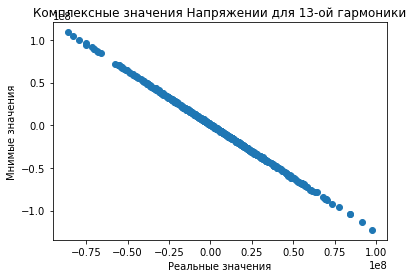

In [35]:
phaseA = [phases[0][0] for phases in result_dict["U_k"]]
x = [number.real for number in phaseA]
y = [number.imag for number in phaseA]
plot.scatter(x, y)
plot.title("Комплексные значения Напряжении для 13-ой гармоники")
plot.xlabel("Реальные значения")
plot.ylabel("Мнимые значения")

Text(0, 0.5, 'Абсолютные значения')

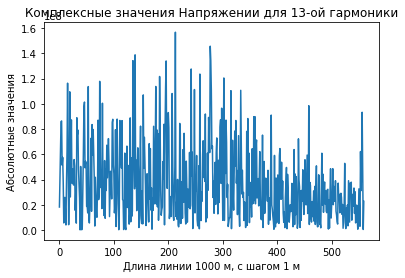

In [36]:
phaseA = [abs(phases[0][0]) for phases in result_dict["U_k"]]
plot.plot(phaseA)
plot.title("Комплексные значения Напряжении для 13-ой гармоники")
plot.xlabel("Длина линии 1000 м, с шагом 1 м")
plot.ylabel("Абсолютные значения")

C:\Users\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, 'Значения')

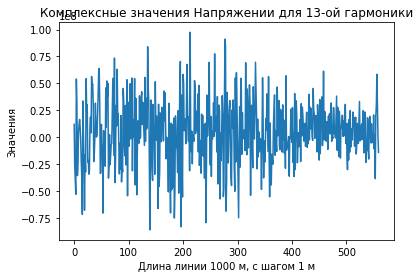

In [37]:
phaseA = [(phases[0][0]) for phases in result_dict["U_k"]]
plot.plot(phaseA)
plot.title("Комплексные значения Напряжении для 13-ой гармоники")
plot.xlabel("Длина линии 1000 м, с шагом 1 м")
plot.ylabel("Значения")